In [63]:
from pandas import read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV,train_test_split , cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# **Dataset - Company Data**

In [64]:
df = pd.read_csv("/content/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **Dataset - Information**

> About the data: 

> Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

1. Sales -- Unit sales (in thousands) at each location
2. Competitor Price -- Price charged by competitor at each location
3. Income -- Community income level (in thousands of dollars)
4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)
5. Population -- Population size in region (in thousands)
6. Price -- Price company charges for car seats at each site
7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age -- Average age of the local population
9. Education -- Education level at each location
10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not
 
 



# **Problem Statement:**



* A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# **EDA**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [67]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [68]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [69]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Sales 
 7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64
CompPrice 
 121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
Income 
 69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
Advertising 
 0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64
Population 
 276    4
148    4
237    4
170    4
220    4
      ..
216    1
492    1
356    1
416    1
368    1
Name: Population, Length: 275, dtype: int64
Price 
 120    12
128    12
107    10
1

In [70]:
for col in df:
    print(f'{col}:\n {df[col].unique()}')

Sales:
 [ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   8.85 13.39  7.99  9.46  6.5   5.52 12.61
  8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  2.23  8.7  11.7   6.56
  7.95  5.33  4.81  4.53  8.86  8.39  5.58  9.48  7.45 12.49  4.88  4.11
  5.3   5.07  4.62  5.55  0.16  3.47  8.98  9.    6.62  6.67  6.01  9.31
  8.54  8.8   7.57  7.37  6.87 11.67  6.88  8.19  8.87  9.34 11.27  6.52
  4.96  4.47  8.41  9.54  7.62  3.67  6.44  5.17 10.27 12.3   6.03  6.53
  7.44  0.53  9.09  3.9  10.51  7.56 11.48 10.49 10.77  7.64  5.93  6.89
  7.71  7.49 10.21 12.53  9.32  4.67  2.93  3.63  5.68  8.22  0.37  6.71
  7.3   9.03  6.38  0.    7.54  5.61 10.48 

In [71]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['ShelveLoc', 'Urban', 'US']


There are 8 Numeric variables

The Numeric variables are :
 ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [72]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


## **Visualisation**

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


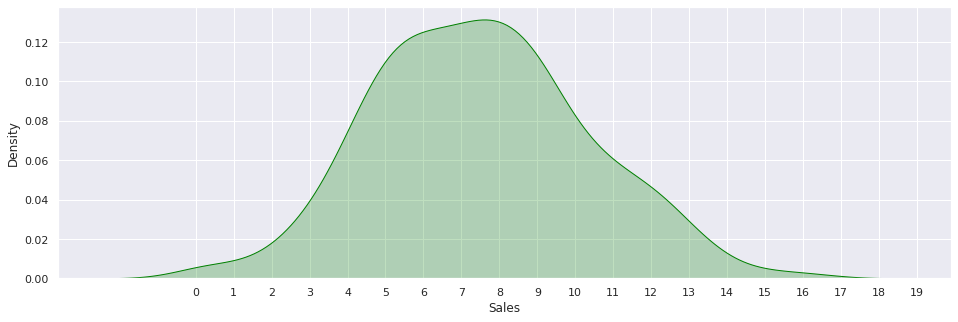

Skew: -0.04275457528359782
Kurtosis: 0.041666402841529226


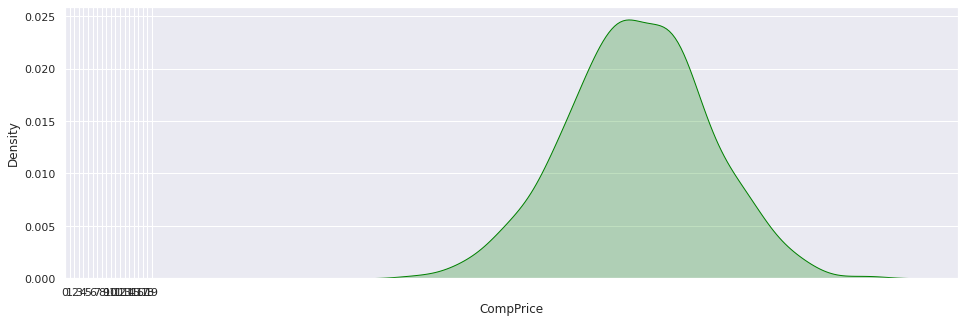

Skew: 0.04944448796161163
Kurtosis: -1.0852889894205275


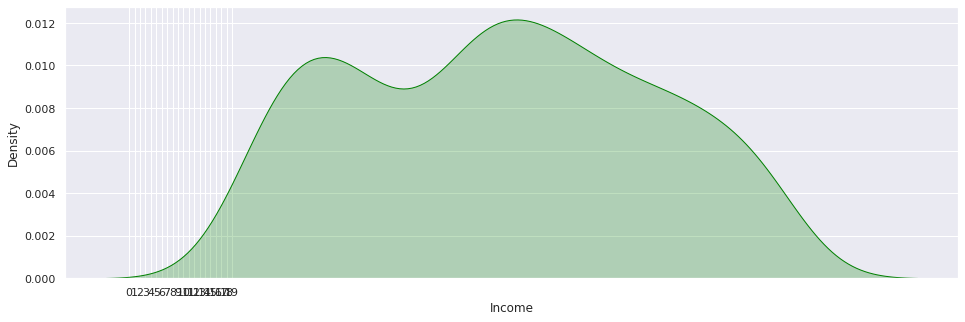

Skew: 0.6395857712012682
Kurtosis: -0.54511783750007


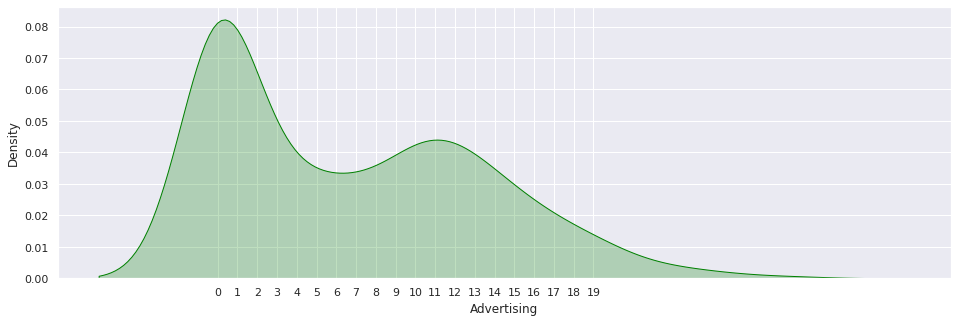

Skew: -0.05122663813815477
Kurtosis: -1.2023183469881713


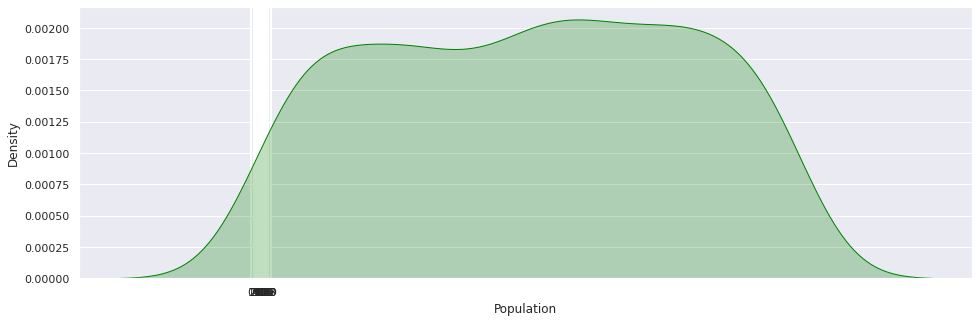

Skew: -0.12528619394494211
Kurtosis: 0.45188500467657766


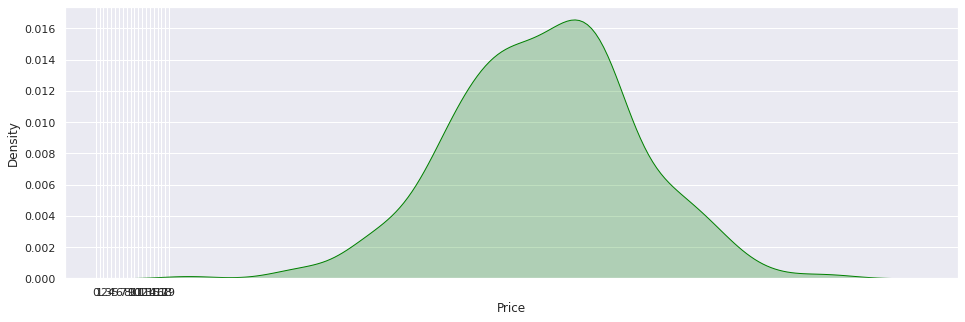

Skew: -0.07718173189535066
Kurtosis: -1.1343919819459476


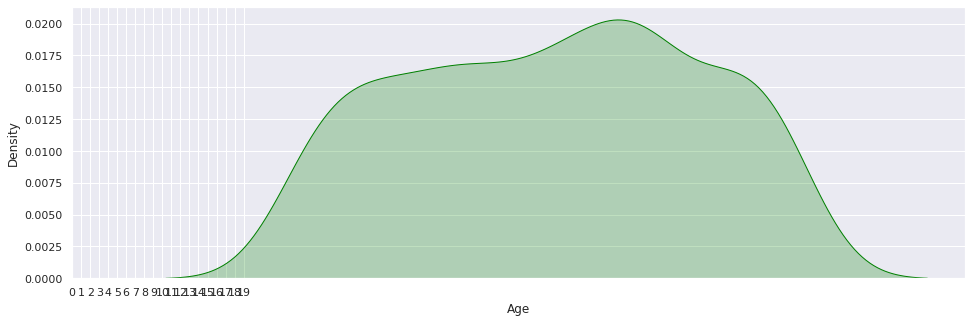

Skew: 0.044006827429473115
Kurtosis: -1.2983317016794282


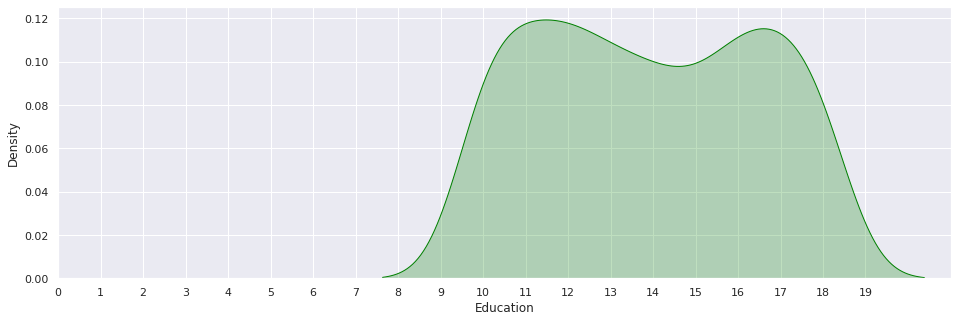

In [73]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


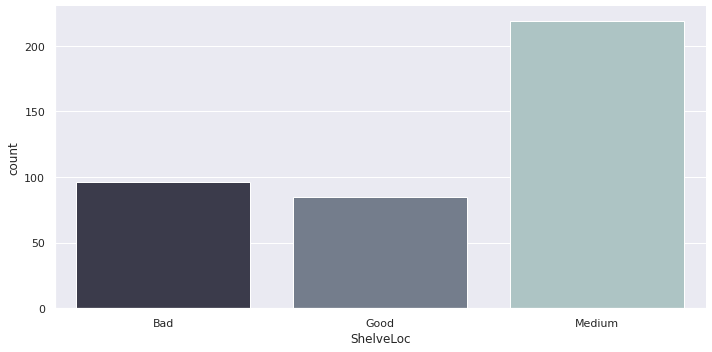

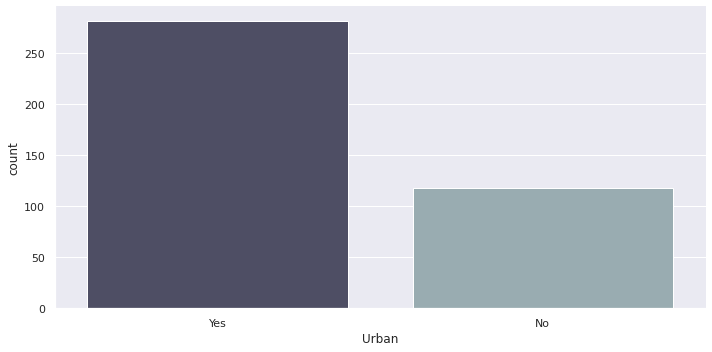

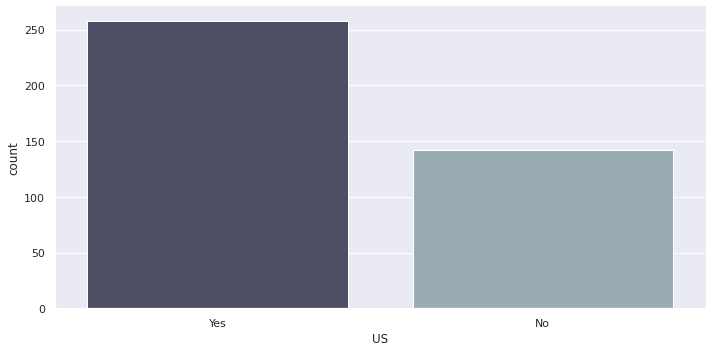

In [74]:
for i in categorical:
  sns.catplot(i, data=df, kind="count",height = 5,aspect = 2, palette="bone")
  

<Figure size 432x288 with 0 Axes>

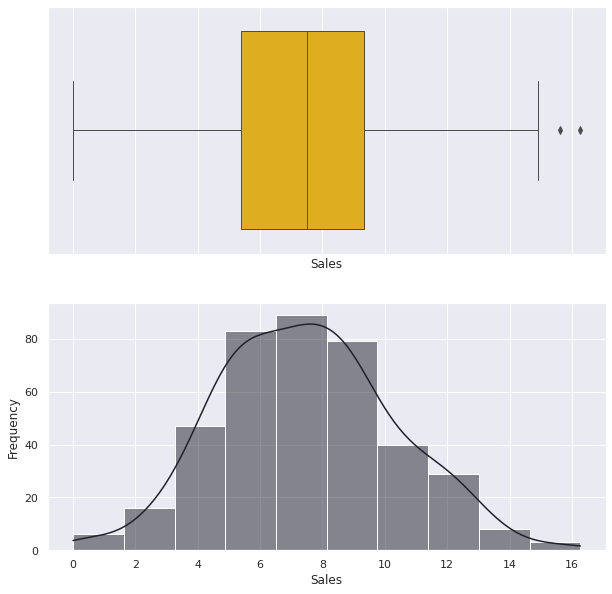

<Figure size 720x720 with 0 Axes>

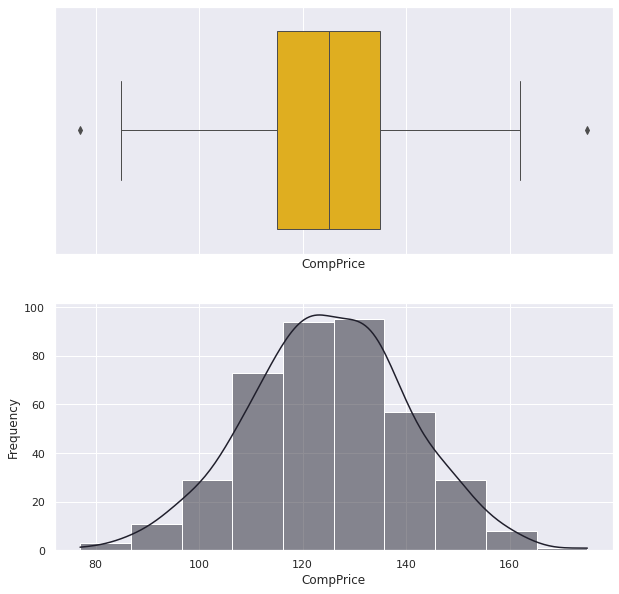

<Figure size 720x720 with 0 Axes>

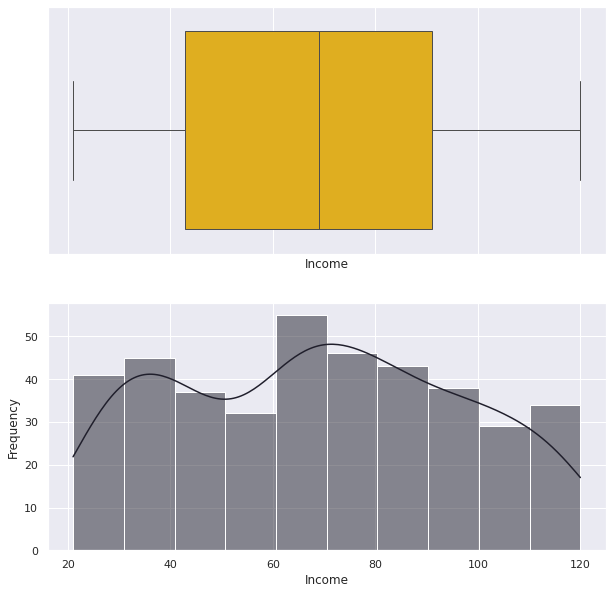

<Figure size 720x720 with 0 Axes>

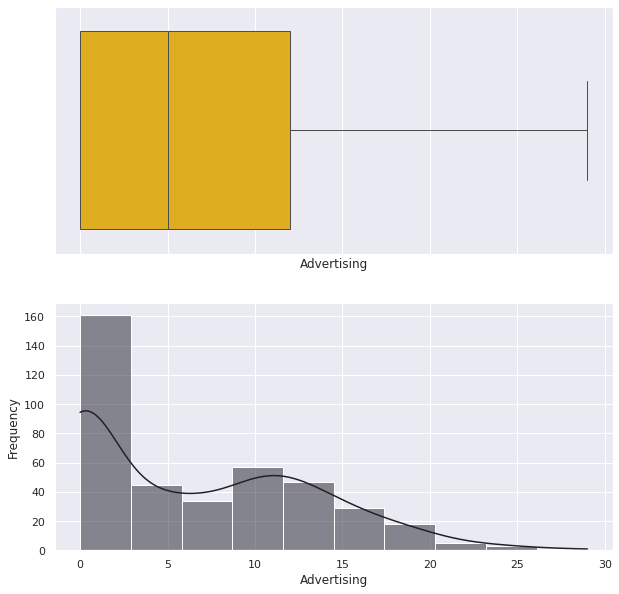

<Figure size 720x720 with 0 Axes>

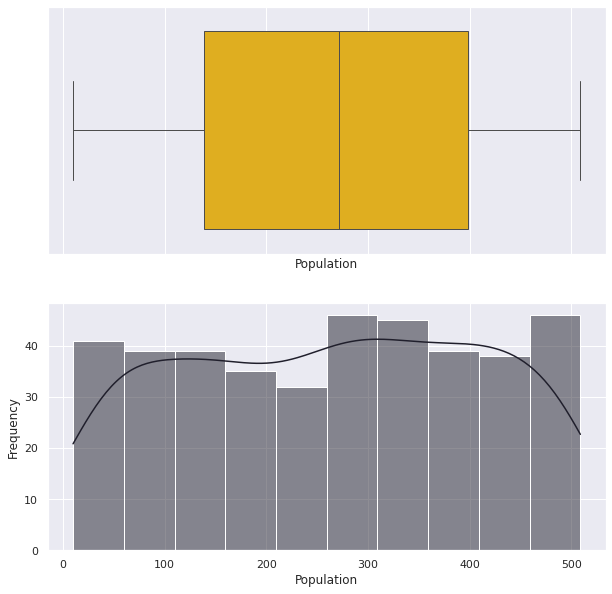

<Figure size 720x720 with 0 Axes>

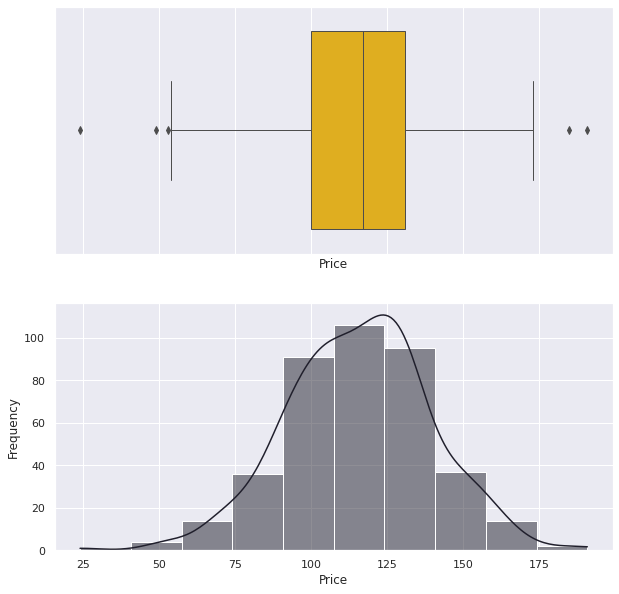

<Figure size 720x720 with 0 Axes>

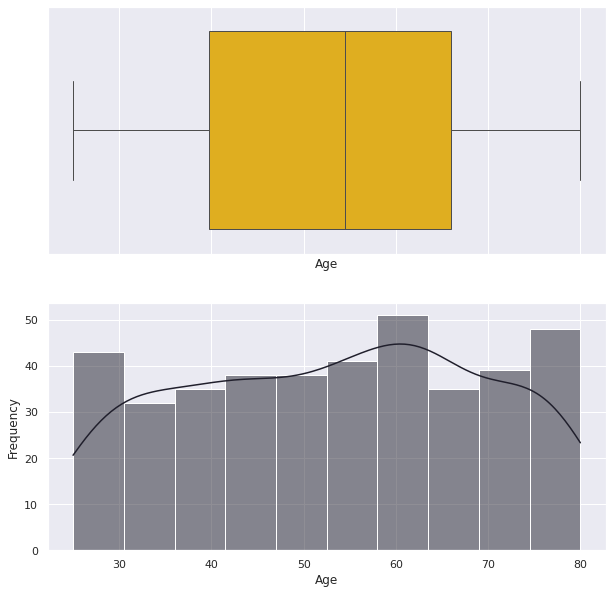

<Figure size 720x720 with 0 Axes>

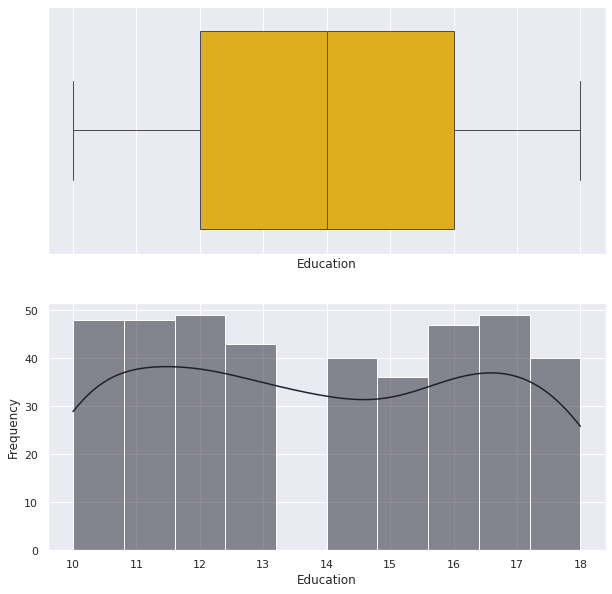

In [75]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="bone")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="Wistia_r")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="Wistia_r")

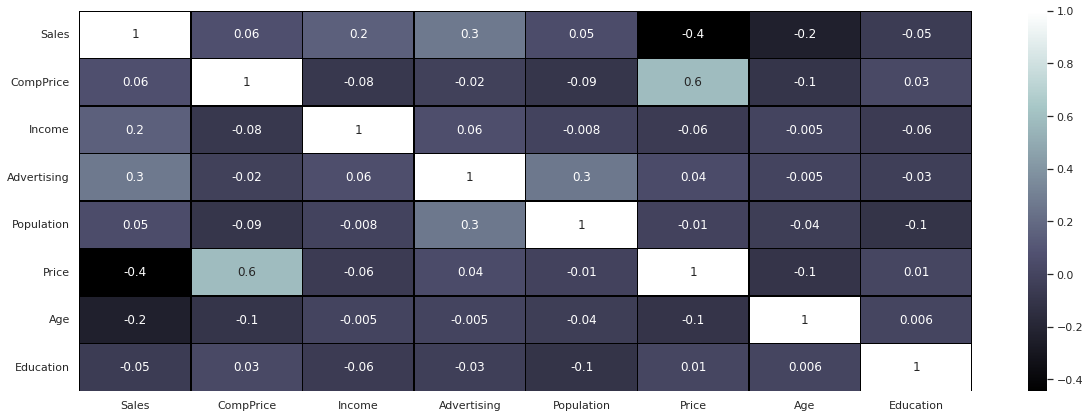

In [76]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="bone", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

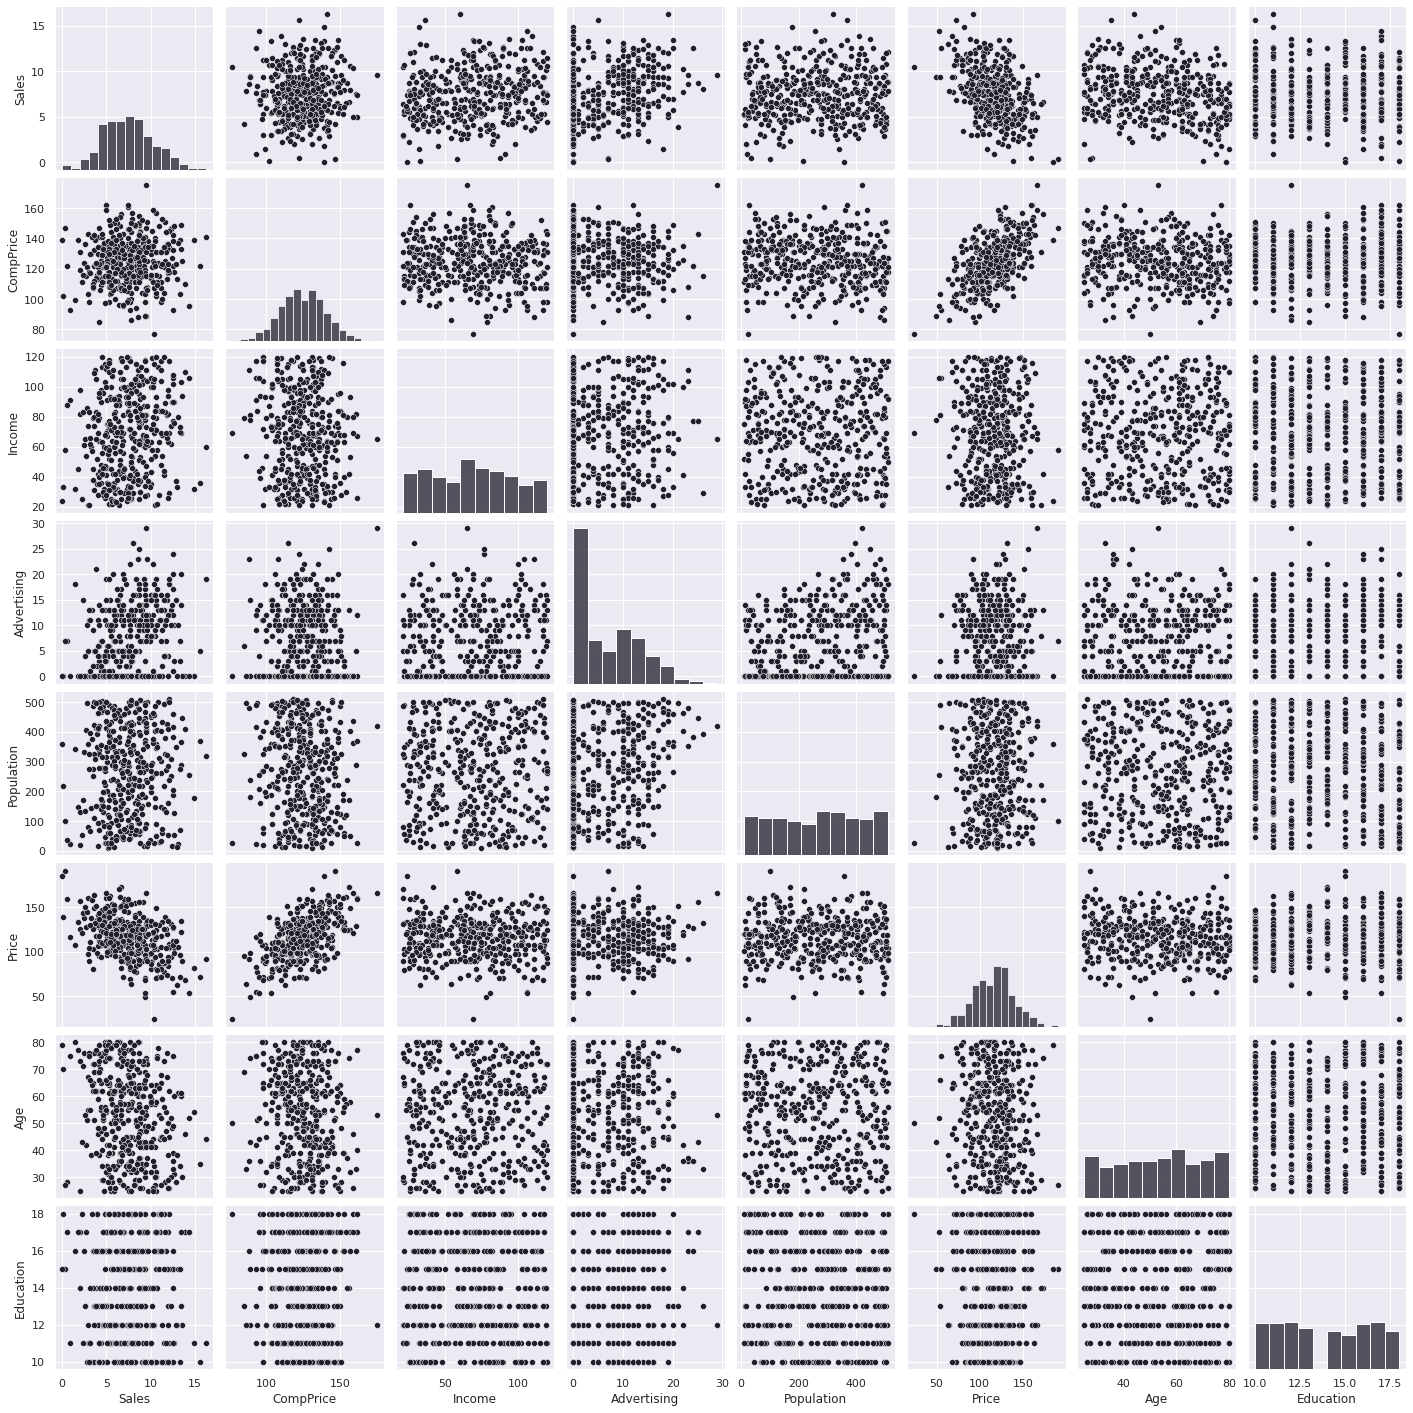

In [77]:
#pairwise plot of all the features
sns.pairplot(df)
plt.show()



---


# **Random forest**

---



## **Encoding Variables**

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

data=df.copy()

columns1=['ShelveLoc' ,'Urban','US']


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(data[[i]]), columns=data[i].unique())
   data = pd.concat([x,data], axis=1, join="inner").drop(i,axis=1)


data

,Yes,No,Yes,No,Bad,Good,Medium,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,9.50,138,73,11,276,120,42,17
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11.22,111,48,16,260,83,65,10
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,10.06,113,35,10,269,80,59,12
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.40,117,100,4,466,97,55,14
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.57,138,108,17,203,128,33,14
396,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.14,139,23,3,37,120,55,11
397,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.41,162,26,12,368,159,40,18
398,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.94,100,79,7,284,95,50,12


* **our target variable is sale and it is normally distributed , so we will use mean for converting it into categorical.**

In [79]:
data["Sales"].mean()

7.496325000000001

*  **As a cloth manufacturing company is interested to know about the segment or attributes causes high sale,so trying to divide the high sales and low sales**

In [80]:
data.loc[data["Sales"] <= 7.496325,"Sales_transform"]="0"
data.loc[data["Sales"] >= 7.496325,"Sales_transform"]="1"
data

,Yes,No,Yes,No,Bad,Good,Medium,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_transform
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,9.50,138,73,11,276,120,42,17,1
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11.22,111,48,16,260,83,65,10,1
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,10.06,113,35,10,269,80,59,12,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.40,117,100,4,466,97,55,14,0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.15,141,64,3,340,128,38,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.57,138,108,17,203,128,33,14,1
396,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.14,139,23,3,37,120,55,11,0
397,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.41,162,26,12,368,159,40,18,0
398,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.94,100,79,7,284,95,50,12,0


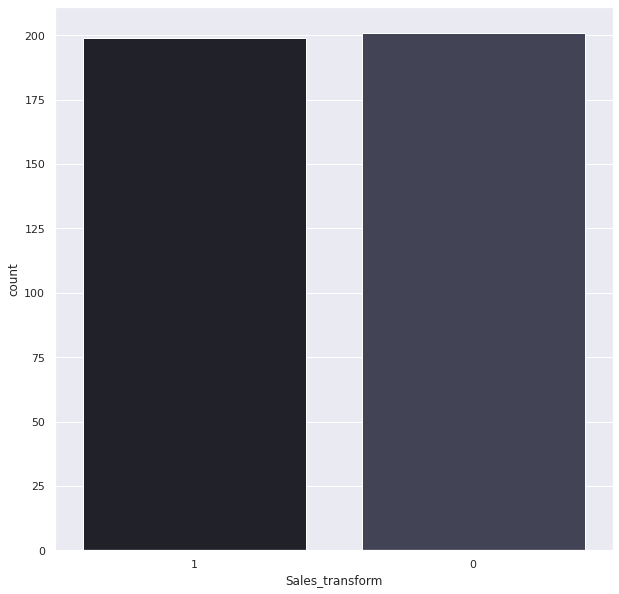

In [81]:
sns.countplot(data["Sales_transform"])
plt.show()

## **Feature Scalling:**

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.        , 1.        , 0.        , ..., 0.30909091, 0.875     ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.72727273, 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.61818182, 0.25      ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.27272727, 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.45454545, 0.25      ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.43636364, 0.75      ,
        1.        ]])

In [83]:
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data

,Yes,No,Yes,No,Bad,Good,Medium,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_transform
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0
396,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0
397,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0
398,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0


In [84]:
scaled_data["Sales_transform"].value_counts()

0.0    201
1.0    199
Name: Sales_transform, dtype: int64

In [85]:
x = scaled_data.iloc[:,0:15]
y = scaled_data['Sales_transform']
x

,Yes,No,Yes,No,Bad,Good,Medium,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500
396,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125
397,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000
398,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250


## **Splitting data into training and testing**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 15)
(120, 15)
(280,)
(120,)


## **Model Building - Random Forest**

In [88]:
rfc = RandomForestClassifier(bootstrap=True,n_estimators = 10,max_depth=4, random_state = 42)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=10, random_state=42)

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1608637542)


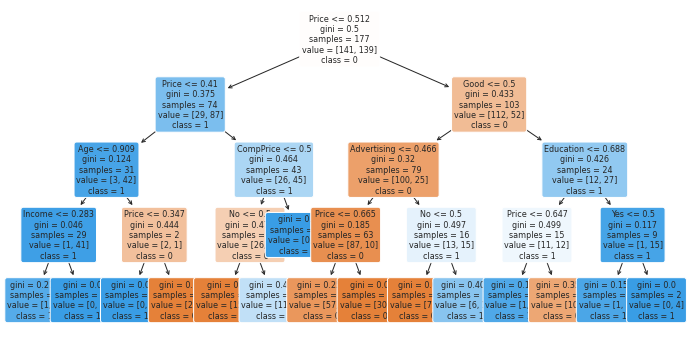

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1273642419)


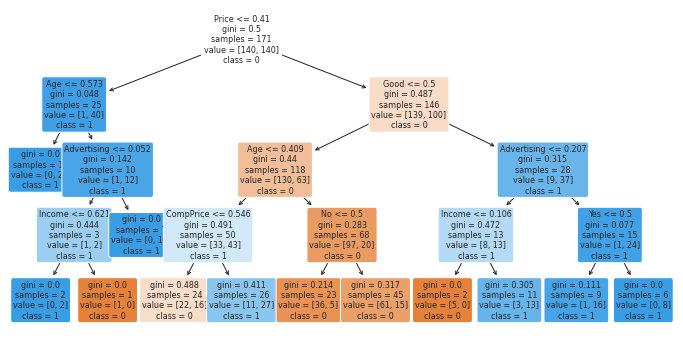

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1935803228)


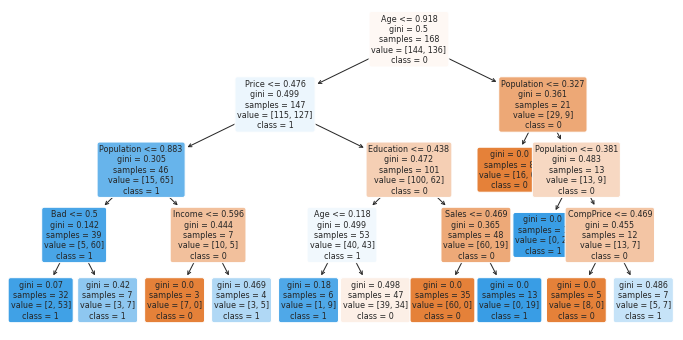

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=787846414)


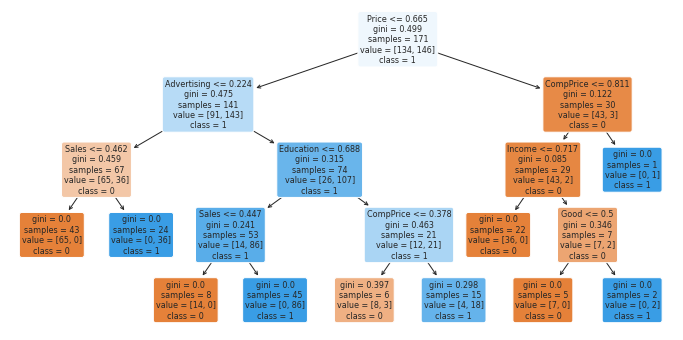

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=996406378)


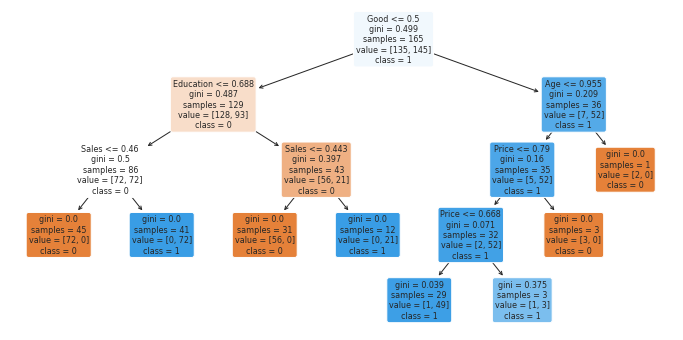

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1201263687)


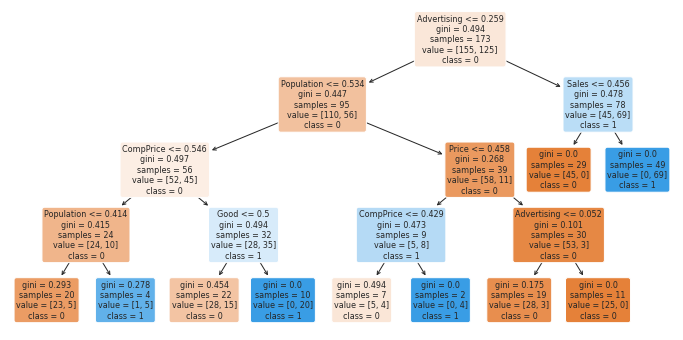

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=423734972)


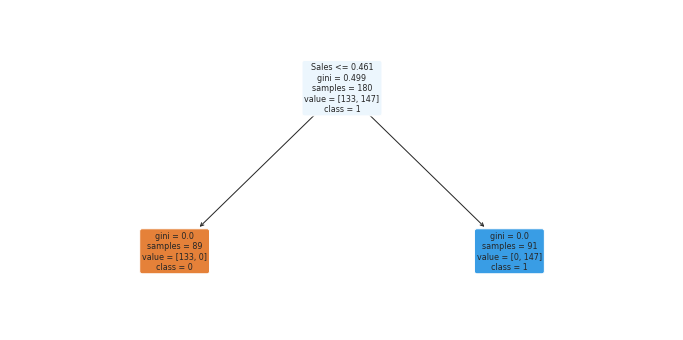

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=415968276)


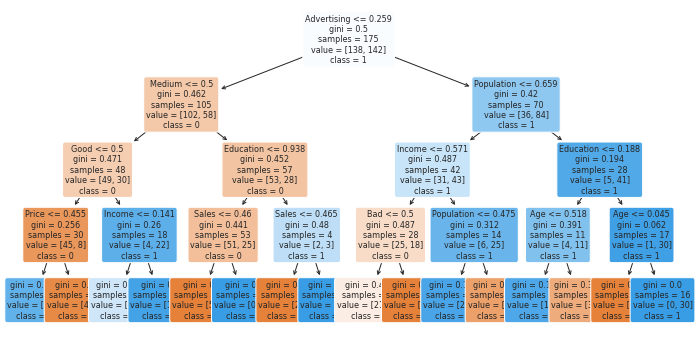

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=670094950)


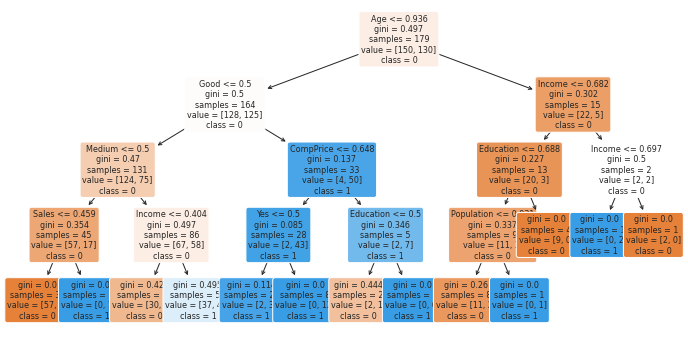

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1914837113)


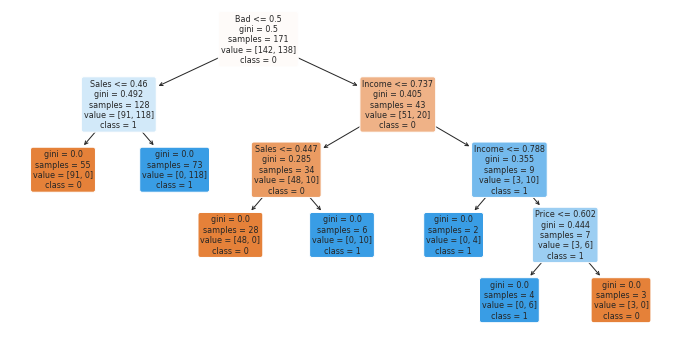

In [89]:
from sklearn import tree

features = x.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [90]:
# Predict the test set labels
y_pred = rfc.predict(X_test)
pd.Series(y_pred).value_counts()

1.0    63
0.0    57
dtype: int64

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        58
         1.0       0.98      1.00      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



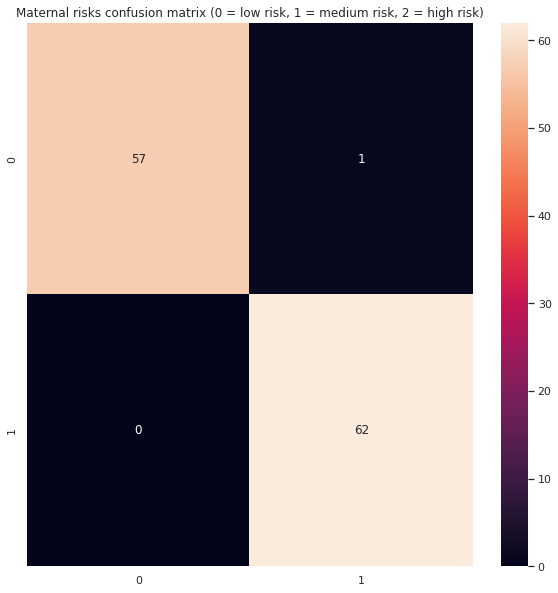

In [91]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [92]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 0.9964
Test set score: 0.9917


In [93]:
df1 = pd.DataFrame({'actual': y_test, 'Entro_Prediction': y_pred})
df1.head()

,actual,Entro_Prediction
398,0.0,0.0
125,1.0,1.0
328,0.0,0.0
339,1.0,1.0
172,1.0,1.0


In [94]:
# print the scores between dependent test and predicted value

print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 99.16666666666667




 ROC AUC score: 0.9913793103448275 




Text(0, 0.5, 'True Positive Rate')

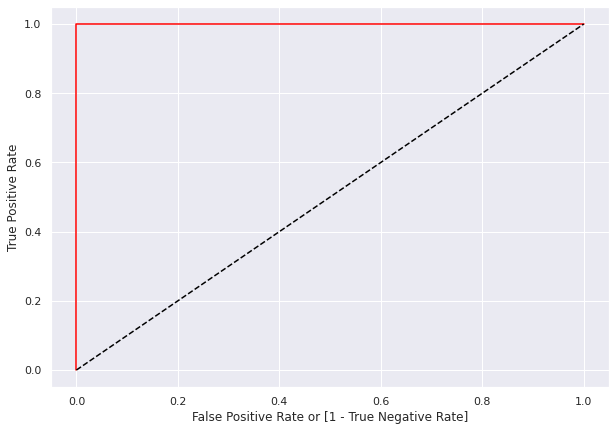

In [95]:
# plot ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize= (10,7))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')

## **Feature Importance:**

[[]]

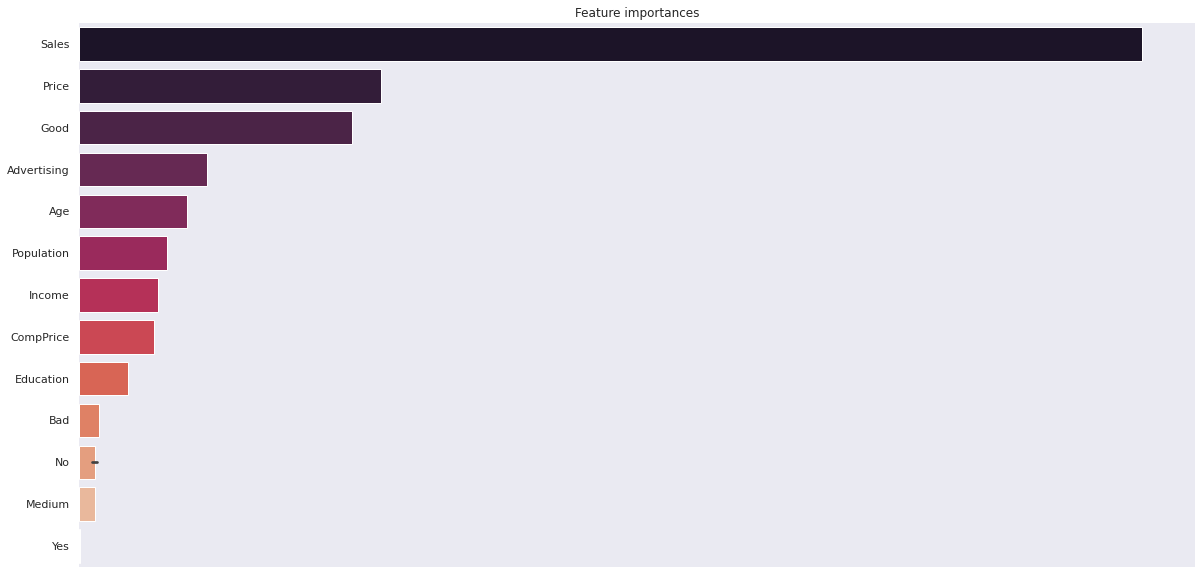

In [96]:
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
plt.figure(figsize=(20,10))
# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
# for value in g.containers:
#     g.bar_label(value, padding=2)